In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
data_dir='D:\\Msc GU\\Msc 4th Sem\\Project\\DataSet\\teadataset'

In [4]:
# Set up data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Load in the dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [5]:
batch_size=32

In [3]:
# Step 1: Choose a pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, 
                   input_shape=(224, 224, 3))

# Step 2: Load the pre-trained model
model = Sequential()
model.add(base_model)

# Step 3: Freeze initial layers
for layer in base_model.layers:
    layer.trainable = False

# Step 4: Add new classification layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))  

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 21,139,528
Trainable params: 6,424,840
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
# Step 5: Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit(
    train_data,
    epochs=50,
    batch_size=batch_size,
    validation_data=val_data
)

Epoch 1/50
23/23 [==============================] - 454s 20s/step - loss: 3.7420 - accuracy: 0.2475 - val_loss: 1.6847 - val_accuracy: 0.4195
Epoch 2/50
23/23 [==============================] - 443s 19s/step - loss: 1.3205 - accuracy: 0.5359 - val_loss: 1.5065 - val_accuracy: 0.4598
Epoch 3/50
23/23 [==============================] - 432s 19s/step - loss: 1.0682 - accuracy: 0.6273 - val_loss: 1.4730 - val_accuracy: 0.4828
Epoch 4/50
23/23 [==============================] - 436s 19s/step - loss: 0.8635 - accuracy: 0.6793 - val_loss: 1.1744 - val_accuracy: 0.5747
Epoch 5/50
23/23 [==============================] - 441s 19s/step - loss: 0.8042 - accuracy: 0.6878 - val_loss: 1.1181 - val_accuracy: 0.6207
Epoch 6/50
23/23 [==============================] - 430s 19s/step - loss: 0.8755 - accuracy: 0.6920 - val_loss: 1.4889 - val_accuracy: 0.5345
Epoch 7/50
23/23 [==============================] - 428s 19s/step - loss: 0.7808 - accuracy: 0.7173 - val_loss: 0.9908 - val_accuracy: 0.6322
Epoch 

In [9]:
import matplotlib.pyplot as plt

def plot_loss(history):
    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='lower right')
    plt.show()



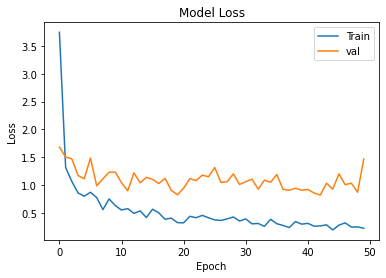

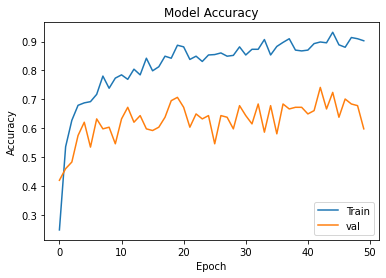

In [10]:
plot_loss(history)
plot_accuracy(history)

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 528 images belonging to 8 classes.


In [12]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

17/17 [==============================] - 195s 11s/step - loss: 0.7200 - accuracy: 0.7689
Test Loss: 0.7200140357017517
Test Accuracy: 0.7689393758773804


In [13]:
# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)



17/17 [==============================] - 195s 11s/step


In [21]:
# Generate the classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.57      0.73         7
           2       0.60      0.75      0.67         4
           3       1.00      1.00      1.00         4
           4       1.00      0.75      0.86         4
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         4
           7       0.62      1.00      0.77         5

    accuracy                           0.81        32
   macro avg       0.78      0.73      0.73        32
weighted avg       0.89      0.81      0.83        32



C:\Users\jenis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 2  5 12  9  8  2  9 13]
 [ 3  7 10  6  6  6  8 21]
 [ 2  2 13  8  2  5 11 17]
 [ 1  4 14  8  6  5 12 17]
 [ 3  1 14  9  5  5  9 14]
 [ 1  3  7  7  5  6  8  7]
 [ 3  8 17  5 12  8 13 19]
 [ 6  8 21 12  7  6  8 17]]


1/1 [==============================] - 11s 11s/step


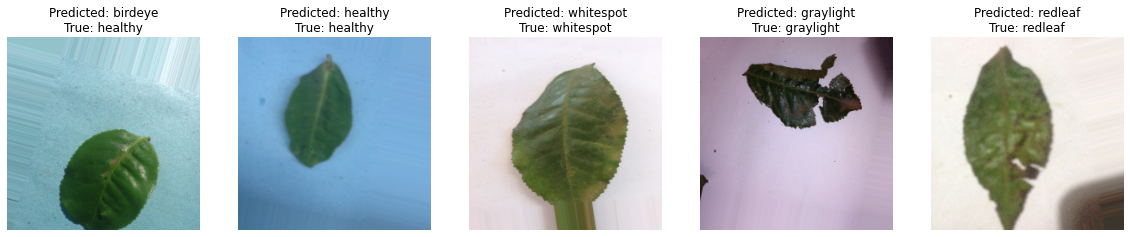

In [15]:
import matplotlib.pyplot as plt

# Get a few images from the test set
num_images = 5
test_images, test_labels = next(test_data)

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


In [20]:
model.save("D:\\Msc GU\\Msc 4th Sem\\Thesis\\Vgg.h5")